<a href="https://colab.research.google.com/github/nenipam/convoeval/blob/main/102117082_AnupamNainiwal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Anupam Nainiwal**  
Email: `anainiwal_be21@thapar.edu`  
Roll No: **102117082**  
Group: **4CS3**  
Start Timestamp: 20240911-1038  

## Question

Table of Contents
_________________

1. Logistics
2. Task
3. Deliverables
4. Evaluation
5. Note
6. Struts


1 Logistics
===========

  + Start time: Wed Sep 11 10:00 AM
  + End Time: Wed Sep 11 04:00 PM
  + Submission Form:
    <https://docs.google.com/forms/d/e/1FAIpQLSc2aAG33E0rQgs3OsrpyjyREwy9OKK_WnKqmBLvD7pzM4sOvg/viewform?usp=sf_link>
  + Viva Voce: Will be notified later.


2 Task
======

  Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.


3 Deliverables
==============

  1. A PDF Report: (as a part of your Git Repo) named
     <ROLL_NO>-report.pdf
  2. Assets: Your pretrained classifier model weights and your cleaned
     and well-formed dataset.  This should be a part of your google
     drive with read access to your instructor <bv.raghav@thapar.edu>
  3. A demo notebook: (as a part of your Git Repo), that loads both your
     model and dataset; and runs to show the results.
  4. The demo notebook should verify the assets using a checksum
     (md5/sha/…).  This step verifies that the assets have not been
     tampered with at a later stage.


4 Evaluation
============

  1. Clarity of thought process and presentation.
  2. Data processing skills.
  3. Model fine tuning/ training skills.
  4. Details of progress, as in what were the encountered problems and
     how were they solved.
  5. How adaptable is your pipeline? (as in, how easy is it for me to
     adapt it for my voice)
  6. How scalable is your approach? (as in, how easy is it to scale it
     to many new voices)
  7. Strengths and Shortcomings of your approach.


5 Note
======

  1. This is a test of how fast can we report the performance of a model
     for a specific task.  The best performance is not expected; but a
     holistic pipeline is.
  2. You may improve upon it in future, out of interest; though it
     wouldn’t influence your eval.


6 Struts
========

  The following tutorials may be a good start point; there maybe more on
  the internet.  You are free to choose.
  1. <https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/c64f4bad00653411821adcb75aea9015/speech_command_classification_with_torchaudio_tutorial.ipynb#scrollTo=i0pBRWkcxWrX>
  2. <https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/audio/simple_audio.ipynb>

## Solution

In [ ]:
!wget -O dataset.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2024-09-11 08:59:10--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘dataset.tar.gz’

dataset.tar.gz      100%[===================>]   2.26G   180MB/s    in 15s     

2024-09-11 08:59:25 (155 MB/s) - ‘dataset.tar.gz’ saved [2428923189/2428923189]



In [ ]:
data_dir = '/content'

In [ ]:
import os
print(os.listdir('/content'))

['.config', 'dataset.tar.gz', 'sample_data']


In [ ]:

commands = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Commands in the dataset: {commands}")

file_counts = {command: len(os.listdir(os.path.join(data_dir, command))) for command in commands}
print(f"Number of files per command: {file_counts}")


Commands in the dataset: ['.config', 'sample_data']
Number of files per command: {'.config': 10, 'sample_data': 6}


Streaming output truncated to the last 5000 lines.
/content/cat/4c6167ca_nohash_0.wav
/content/cat/e32ff49d_nohash_0.wav
/content/cat/f292725f_nohash_0.wav
/content/cat/74551073_nohash_0.wav
/content/cat/11b1df78_nohash_1.wav
/content/cat/efab2cbd_nohash_1.wav
/content/cat/92b0a735_nohash_0.wav
/content/cat/5f1b1051_nohash_0.wav
/content/cat/fb8c31a9_nohash_0.wav
/content/cat/9f92fb7c_nohash_0.wav
/content/cat/b59fe16d_nohash_1.wav
/content/cat/f839238a_nohash_0.wav
/content/cat/a8688b67_nohash_1.wav
/content/cat/3e3fa7fd_nohash_0.wav
/content/cat/7cb5c0b7_nohash_0.wav
/content/cat/59fe87e6_nohash_1.wav
/content/cat/c86d4fd4_nohash_1.wav
/content/cat/1a5b9ca4_nohash_0.wav
/content/cat/9b027ecf_nohash_0.wav
/content/cat/f15a354c_nohash_0.wav
/content/cat/7f581e94_nohash_0.wav
/content/cat/77def3ee_nohash_0.wav
/content/cat/13199b79_nohash_1.wav
/content/cat/45adf84a_nohash_1.wav
/content/cat/2151b09a_nohash_0.wav
/content/cat/3efef882_nohash_0.wav
/content/cat/9a76f8c3_nohash_0.wav
/con

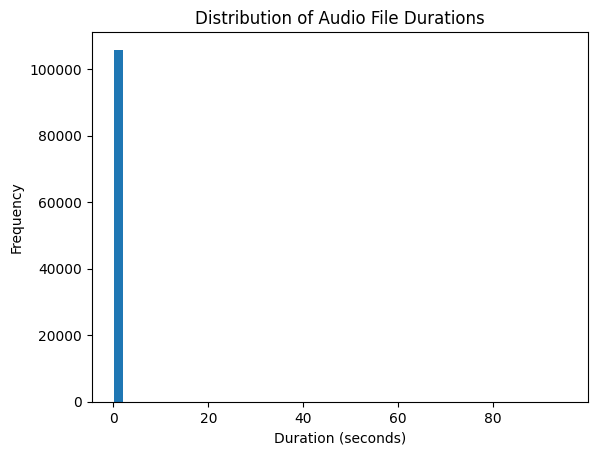

In [ ]:
import wave
import numpy as np
from collections import Counter
import os
import matplotlib.pyplot as plt

def get_audio_properties(filename):
    with wave.open(filename, 'r') as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration, rate

# Assuming 'commands' is a list of subdirectories in your dataset
commands = [d for d in os.listdir('/content') if os.path.isdir(os.path.join('/content', d))]

durations = []
for command in commands:
    class_dir = os.path.join('/content', command)
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            filepath = os.path.join(class_dir, filename)
            try:
                print(filepath)
                duration, rate = get_audio_properties(filepath)
                durations.append(duration)
            except:
                pass

durations = np.array(durations)
print(f"Mean duration: {np.mean(durations)}")
print(f"Max duration: {np.max(durations)}")
print(f"Min duration: {np.min(durations)}")
print(f"Standard deviation: {np.std(durations)}")

plt.hist(durations, bins=50)
plt.title('Distribution of Audio File Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import tensorflow as tf
import pathlib

batch_size = 32
sampling_rate = 16000

data_dir = pathlib.Path(data_dir)

def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(audio_binary)
    return tf.squeeze(audio, axis=-1)

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

def preprocess(file_path):
    audio_binary = tf.io.read_file(file_path)
    audio = decode_audio(audio_binary)
    label = get_label(file_path)
    return audio, label

file_paths = [str(p) for p in data_dir.glob('*/*.wav')]
labels = [p.parts[-2] for p in data_dir.glob('*/*.wav')]

ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))
ds = ds.map(lambda x, y: preprocess(x), num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds = ds.batch(batch_size)
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [1]:
import hashlib
import requests
import tarfile
import os

url = "http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz"
local_filename = "speech_commands_v0.02.tar.gz"
expected_md5_checksum = "6b74f3901214cb2c2934e98196829835"

def compute_md5(file_path):
    hash_md5 = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def download_file(url, local_filename):
    response = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print(f"Downloaded {local_filename}")

def verify_checksum(file_path, expected_checksum):
    calculated_checksum = compute_md5(file_path)
    if calculated_checksum == expected_checksum:
        print("Checksum verified. The file is intact.")
        return True
    else:
        print(f"Checksum mismatch! Expected: {expected_checksum}, Got: {calculated_checksum}")
        return False

def extract_file(file_path):
    if tarfile.is_tarfile(file_path):
        with tarfile.open(file_path, "r:gz") as tar:
            tar.extractall(path=os.path.dirname(file_path))
        print("Dataset extracted successfully.")
    else:
        print("File is not a valid tar.gz file.")

download_file(url, local_filename)

if verify_checksum(local_filename, expected_md5_checksum):
    extract_file(local_filename)


Downloaded speech_commands_v0.02.tar.gz
Checksum verified. The file is intact.
Dataset extracted successfully.


File: dog.wav | Duration: 1.64s | Rate: 48000 Hz
File: go.wav | Duration: 1.66s | Rate: 48000 Hz
File: one.wav | Duration: 1.64s | Rate: 48000 Hz
File: bird.wav | Duration: 1.54s | Rate: 48000 Hz
File: forward.wav | Duration: 2.24s | Rate: 48000 Hz
File: wow.wav | Duration: 1.62s | Rate: 48000 Hz
File: cat.wav | Duration: 1.88s | Rate: 48000 Hz
File: yes.wav | Duration: 1.64s | Rate: 48000 Hz
File: no.wav | Duration: 1.77s | Rate: 48000 Hz
File: learn.wav | Duration: 1.71s | Rate: 48000 Hz
File: down.wav | Duration: 1.71s | Rate: 48000 Hz
File: sheila.wav | Duration: 1.75s | Rate: 48000 Hz
File: seven.wav | Duration: 1.86s | Rate: 48000 Hz
File: off.wav | Duration: 1.54s | Rate: 48000 Hz
File: right.wav | Duration: 1.75s | Rate: 48000 Hz
File: four.wav | Duration: 1.43s | Rate: 48000 Hz
File: follow.wav | Duration: 1.96s | Rate: 48000 Hz
File: two.wav | Duration: 1.56s | Rate: 48000 Hz
File: marvin.wav | Duration: 1.81s | Rate: 48000 Hz
File: three.wav | Duration: 1.58s | Rate: 48000 H

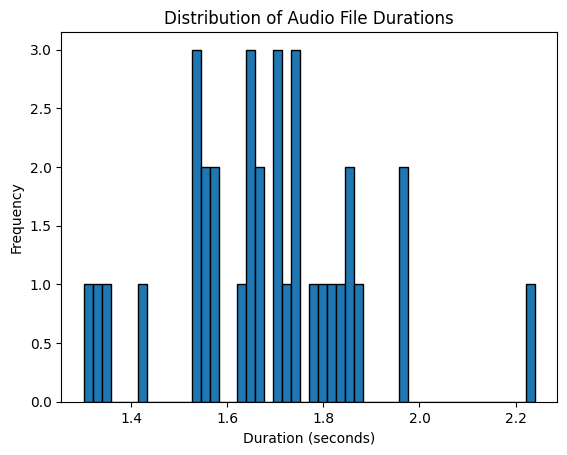

In [ ]:
import wave
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
data_dir = '/content/recs/Recs_wav'
commands = os.listdir(data_dir)

def get_audio_properties(filename):
    with wave.open(filename, 'r') as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration, rate

durations = []


for command in commands:
    filepath = os.path.join(data_dir, command)
    if os.path.isfile(filepath):
        try:
            duration, rate = get_audio_properties(filepath)
            durations.append(duration)
            print(f"File: {command} | Duration: {duration:.2f}s | Rate: {rate} Hz")
        except Exception as e:
            print(f"Error processing {filepath}: {e}")
durations = np.array(durations)

if durations.size > 0:
    print(f"\nMean duration: {np.mean(durations):.2f} seconds")
    print(f"Max duration: {np.max(durations):.2f} seconds")
    print(f"Min duration: {np.min(durations):.2f} seconds")
    print(f"Standard deviation: {np.std(durations):.2f} seconds")
    plt.hist(durations, bins=50, edgecolor='black')
    plt.title('Distribution of Audio File Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No audio files found or processed.")


['/content/no/7ea032f3_nohash_2.wav', '/content/no/2356b88d_nohash_3.wav', '/content/no/5fadb538_nohash_2.wav', '/content/no/ab46af55_nohash_3.wav', '/content/no/611d2b50_nohash_1.wav', '/content/no/408de0a4_nohash_0.wav', '/content/no/f0ac2522_nohash_0.wav', '/content/no/c22d3f18_nohash_3.wav', '/content/no/ed032775_nohash_1.wav', '/content/no/e9abfe31_nohash_0.wav', '/content/no/e0c782d5_nohash_2.wav', '/content/no/74241b28_nohash_4.wav', '/content/no/eeaf97c3_nohash_3.wav', '/content/no/44715c1c_nohash_0.wav', '/content/no/c5a1e46c_nohash_4.wav', '/content/no/4a294341_nohash_1.wav', '/content/no/de08912f_nohash_0.wav', '/content/no/d3831f6a_nohash_0.wav', '/content/no/e8d562ca_nohash_1.wav', '/content/no/3f45a0cf_nohash_3.wav', '/content/no/cc3b5b62_nohash_0.wav', '/content/no/1a994c9f_nohash_1.wav', '/content/no/a8cf01bc_nohash_0.wav', '/content/no/7211390b_nohash_3.wav', '/content/no/90b0b91a_nohash_1.wav', '/content/no/74241b28_nohash_1.wav', '/content/no/f192e6b4_nohash_0.wav', 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3307/3307 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.0000e+00 - loss: 4.5333 - val_accuracy: 0.0000e+00 - val_loss: 3.3765
121/121 - 2s - 15ms/step - accuracy: 0.0000e+00 - loss: 3.3810
Test accuracy: 0.0


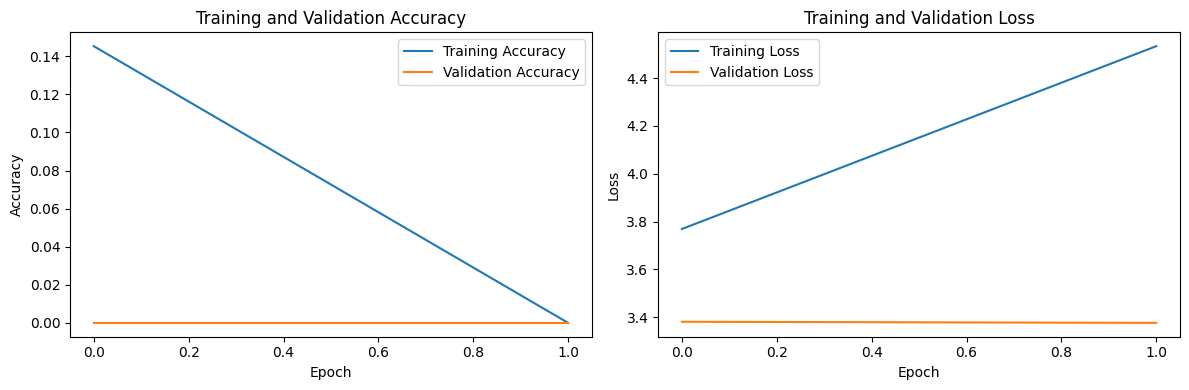

In [ ]:
import tensorflow as tf
import pathlib
import os
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Parameters
batch_size = 32
sampling_rate = 16000

# Directory paths
train_data_dir = pathlib.Path('/content')
test_data_dir = pathlib.Path('/content/one')

# Helper functions
def decode_audio(audio_binary):
    """Decode WAV-encoded audio files to float tensors."""
    audio, _ = tf.audio.decode_wav(audio_binary, desired_channels=1, desired_samples=sampling_rate)
    return tf.squeeze(audio, axis=-1)

def preprocess(file_path, label):
    """Preprocess function to decode audio and encode labels."""
    audio_binary = tf.io.read_file(file_path)
    audio = decode_audio(audio_binary)
    audio = tf.reshape(audio, [sampling_rate, 1])  # Ensure correct shape
    return audio, label

def get_label(file_path):
    """Extract label from the file path (parent directory name)."""
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

# Get all WAV file paths and corresponding labels for training
train_file_paths = [str(p) for p in train_data_dir.glob('*/*.wav')]
print(train_file_paths)
train_labels = [p.parts[-2] for p in train_data_dir.glob('*/*.wav')]

# Convert labels to numeric values
label_to_index = {label: index for index, label in enumerate(set(train_labels))}
train_labels = [label_to_index[label] for label in train_labels]

# Create TensorFlow dataset for training
train_file_paths_ds = tf.data.Dataset.from_tensor_slices(train_file_paths)
train_labels_ds = tf.data.Dataset.from_tensor_slices(train_labels)
train_ds = tf.data.Dataset.zip((train_file_paths_ds, train_labels_ds))

# Preprocess the training dataset
train_ds = train_ds.map(lambda file_path, label: preprocess(file_path, label))
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Get all WAV file paths and corresponding labels for testing
test_file_paths = [str(p) for p in test_data_dir.glob('*.wav')]
print(test_file_paths)
test_labels = [p.parts[-2] for p in test_data_dir.glob('*.wav')]

# Convert test labels to numeric values using the same label_to_index dictionary
test_labels = [label_to_index.get(label, -1) for label in test_labels]  # Use `-1` for unknown labels
test_file_paths, test_labels = zip(*[(f, l) for f, l in zip(test_file_paths, test_labels) if l != -1])  # Filter out unknown labels

# Create TensorFlow dataset for testing
test_file_paths_ds = tf.data.Dataset.from_tensor_slices(list(test_file_paths))
test_labels_ds = tf.data.Dataset.from_tensor_slices(list(test_labels))
test_ds = tf.data.Dataset.zip((test_file_paths_ds, test_labels_ds))

# Preprocess the test dataset
test_ds = test_ds.map(lambda file_path, label: preprocess(file_path, label))
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Build a simple CNN model
model = models.Sequential([
    layers.Input(shape=(sampling_rate, 1)),  # Ensure this matches your data shape
    layers.Conv1D(16, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, strides=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(label_to_index), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Determine steps per epoch
train_steps_per_epoch = len(train_file_paths) // batch_size
test_steps = len(test_file_paths) // batch_size

# Train the model
history = model.fit(train_ds, epochs=2, steps_per_epoch=train_steps_per_epoch,
                    validation_data=test_ds, validation_steps=test_steps)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, steps=test_steps, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
